<a href="https://colab.research.google.com/github/Sivaram-G97/Python_Projects/blob/main/Google_Playstore_App_Prediction/App_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import the Required Libraries


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import joblib

# Import the dataset in Pandas

In [4]:
df = pd.read_csv('/content/googleplaystore.csv')

In [5]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3278,HTC Sense Input-LV,TOOLS,3.6,59,2.3M,"50,000+",Free,0,Everyone,Tools,"April 22, 2014",9.7.753080,4.1 and up
1467,"Domofond Real Estate. Buy, rent an apartment.",HOUSE_AND_HOME,4.5,39123,Varies with device,"1,000,000+",Free,0,Everyone,House & Home,"August 3, 2018",Varies with device,Varies with device
9088,Street Skater 3D,GAME,3.6,120852,21M,"10,000,000+",Free,0,Teen,Action,"October 24, 2017",1.1,4.0.3 and up
10622,MY GULFPORT FL,PRODUCTIVITY,NaN,0,49M,50+,Free,0,Everyone,Productivity,"May 18, 2018",17.4,4.1 and up
3327,Smart Keyboard Trial,TOOLS,4.1,65597,2.4M,"10,000,000+",Free,0,Everyone,Tools,"April 28, 2017",4.20.1,2.3 and up
2821,HD Camera,PHOTOGRAPHY,4.3,49680,8.7M,"5,000,000+",Free,0,Everyone,Photography,"July 11, 2018",1.8.5,4.2 and up
4211,Talking Ben the Dog,FAMILY,4.3,1633565,57M,"100,000,000+",Free,0,Everyone,Entertainment,"July 3, 2018",3.5.2.2,4.1 and up
9198,EB Remote Deposit,BUSINESS,NaN,0,9.0M,10+,Free,0,Everyone,Business,"May 10, 2018",5.1,4.1 and up
5640,Asylum Night Shift - Five Nights Survival,GAME,4.0,59223,46M,"5,000,000+",Free,0,Teen,Action,"June 26, 2018",1.6.5,4.1 and up
3453,"AVG Cleaner – Speed, Battery & Memory Booster",PRODUCTIVITY,4.4,1188154,24M,"10,000,000+",Free,0,Everyone,Productivity,"June 14, 2018",4.6.4,4.1 and up


In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [9]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


# Data Cleaning and Preprocessing

## Deduplication

In [10]:
duplicate_apps = df[df['App'].duplicated(keep = False)]['App'].unique()

In [11]:
for app in duplicate_apps:
  app_subset = df[df['App'] == app]
  has_null_rating = app_subset['Rating'].isnull().any()
  has_non_null_rating = app_subset['Rating'].notnull().any()

  if has_null_rating & has_non_null_rating:
    print(app_subset[['App', 'Rating']])

                 App  Rating
2310  Blood Pressure     4.2
2513  Blood Pressure     NaN
6585  Blood Pressure     4.2


In [12]:
df.drop(index = 2513, inplace = True)

In [13]:
apps_with_mixed_sizes = []

In [14]:
for app in duplicate_apps:
  app_subset = df[df['App'] == app]
  has_variable_size = (app_subset['Size'] == 'Varies with device').any()
  has_concrete_size = (app_subset['Size'] != 'Varies with device').any()

  if has_variable_size & has_concrete_size:
    print(app_subset[['App', 'Rating', 'Size']])
    apps_with_mixed_sizes.append(app)

             App  Rating                Size
477   Calculator     2.6                6.2M
3242  Calculator     4.3  Varies with device
                 App  Rating                Size
1357  Period Tracker     4.5  Varies with device
2344  Period Tracker     4.9                3.7M
              App  Rating                Size
1678  Word Search     4.7                3.9M
1715  Word Search     4.7                3.9M
1882  Word Search     4.7                3.9M
2010  Word Search     4.2  Varies with device
             App  Rating                Size
3292  Flashlight     4.7  Varies with device
3871  Flashlight     4.5                4.9M


In [15]:
apps_with_mixed_sizes

['Calculator', 'Period Tracker', 'Word Search', 'Flashlight']

In [16]:
df = df[~((df['App'].isin(apps_with_mixed_sizes)) & (df['Size'] == 'Varies with device'))]

We have handled the duplicate app entries by strategically prioritizing non-null 'Rating' values and concrete 'Size' values over 'NaN'/'Varies with device' entries. For apps with mixed size information (e.g., 'Calculator', 'Period Tracker'), entries with concrete sizes are kept, and 'Varies with device' entries for the same app are removed.


## Handling Missing Values

In [17]:
df.isnull().sum()

,0
App,0
Category,0
Rating,1473
Reviews,0
Size,0
Installs,0
Type,1
Price,0
Content Rating,1
Genres,0


In [18]:
unknown_ratings_df = df[df['Rating'].isnull()].copy()

In [19]:
df = df.dropna()

Upon inspection, we found that the Rating column has a significant number of missing values (1473). Since Rating is the target variable for our prediction task, these rows cannot be used for training the model. Therefore, we will create a separate DataFrame to store these records and later use the trained model to predict their ratings.

Additionally, Current Ver and Android Ver also contain a small number of missing entries.Therefore, we will drop all rows that contain missing values to ensure a clean and complete dataset for analysis and modeling.

## Standardizing Data Types

In [20]:
df['Reviews'] = pd.to_numeric(df['Reviews'])

In [21]:
df['Installs'] = df['Installs'].str.replace(',', '')
df['Installs'] = df['Installs'].str.replace('+', '')
df['Installs'] = pd.to_numeric(df['Installs'])

In [22]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$7.99', '$5.99', '$2.99', '$3.49',
       '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49', '$10.00',
       '$24.99', '$11.99', '$79.99', '$16.99', '$14.99', '$29.99',
       '$12.99', '$2.49', '$10.99', '$1.50', '$19.99', '$15.99', '$33.99',
       '$39.99', '$3.95', '$4.49', '$1.70', '$8.99', '$1.49', '$3.88',
       '$399.99', '$17.99', '$400.00', '$3.02', '$1.76', '$4.84', '$4.77',
       '$1.61', '$2.50', '$1.59', '$6.49', '$1.29', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$8.49', '$1.75', '$14.00', '$2.00',
       '$3.08', '$2.59', '$19.40', '$3.90', '$4.59', '$15.46', '$3.04',
       '$13.99', '$4.29', '$3.28', '$4.60', '$1.00', '$2.95', '$2.90',
       '$1.97', '$2.56', '$1.20'], dtype=object)

In [23]:
df['Price'] = df['Price'].str.replace('$', '')
df['Price'] = pd.to_numeric(df['Price'])

## Removing Duplicates

In [24]:
df['App'].duplicated().sum()

np.int64(1166)

In [25]:
duplicated_rows = df[df['App'].duplicated(keep=False)]
duplicated_rows.sort_values(by = 'App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,500000,Free,0.00,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,1000000,Free,0.00,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,50000000,Free,0.00,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,10000000,Free,0.00,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


In [26]:
df.drop_duplicates(subset = 'App', inplace = True)

There are 1166 duplicated apps. We have dropped them as these might skew our model.


## Normalize 'Size' Column

In [27]:
def extract_num(x):
        if 'M' in x:
            x = x.replace('M', '')
            return 1000 * float(x)
        elif 'k' in x:
            x = x.replace('k', '')
            return float(x)
        else:
            return np.nan

In [28]:
df['Size'] = df['Size'].apply(extract_num)

In [29]:
df['Size'].isnull().sum()

np.int64(1167)

In [30]:
df.dropna(subset = ['Size'], inplace = True)

# Sanity Checks

* Check if Ratings are between 1 to 5

* Reviews Should not be more than Installs

* When 'Type' is free, 'Price' shouldn't be more then 0

In [31]:
df['Rating'].describe()

,Rating
count,7023.000000
mean,4.160857
std,0.559246
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [32]:
(df['Reviews']>df['Installs']).sum()

np.int64(6)

In [33]:
df = df[df['Reviews'] <= df['Installs']]

In [34]:
((df['Type'] == 'Free') & (df['Price'] > 0)).sum()

np.int64(0)

# Performing Univariate Analysis

Boxplots for Price, reviews and installs to find the outliers

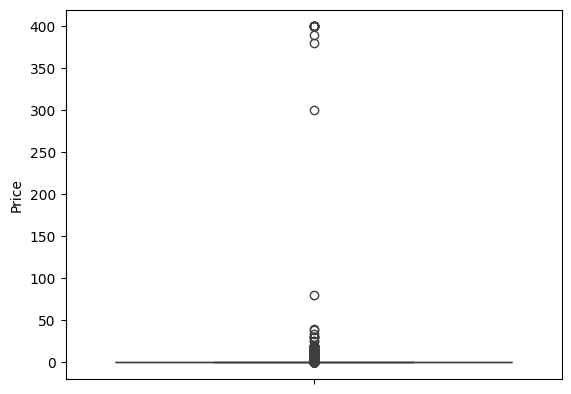

In [35]:
sns.boxplot(df['Price'])
plt.show()

Think about the Price of usual apps on Playstore

Checkout the records with very high price

$200 Seems to be a very high number so drop the columns above it


In [36]:
df = df[df['Price'] < 200]

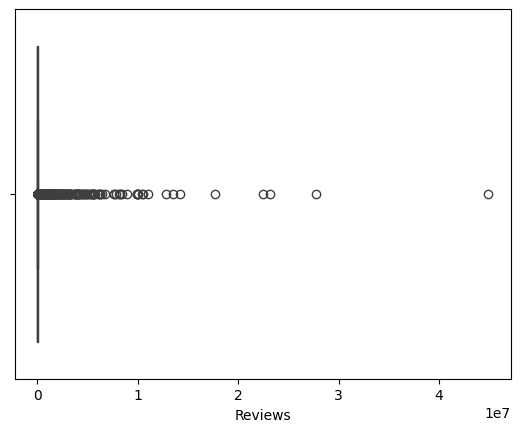

In [37]:
sns.boxplot(x = df['Reviews'])
plt.show()

In [38]:
df[df['Reviews'] < 1000].shape

(3259, 13)

Some apps have very high number of reviews and some apps have very less reviews, these apps which will skew our model.

Drop the coulumns with more than 20,00,000 Reviews and less than 1,000 Reviews

In [39]:
df = df[df['Reviews'] < 2e6]

In [40]:
df = df[df['Reviews'] > 1000]

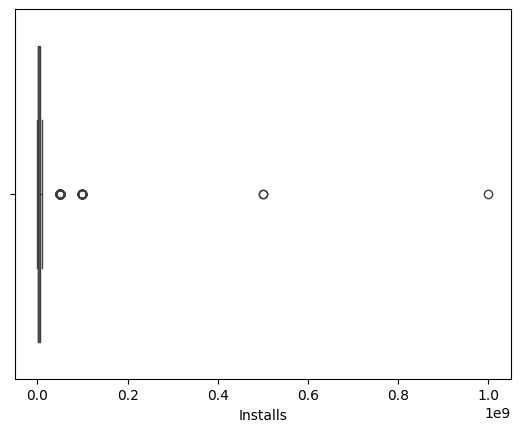

In [41]:
sns.boxplot(x = 'Installs', data = df)
plt.show()

In [42]:
df['Installs'].quantile([0.1,0.25,0.5,0.75,0.9,0.99])

,Installs
0.10,100000.0
0.25,500000.0
0.50,1000000.0
0.75,5000000.0
0.90,10000000.0
0.99,50000000.0


In [43]:
df = df[df['Installs'] < 5e7]

In [44]:
df = df[df['Installs'] > 1000]

Some apps have very high number of Installs and very low number of install, these apps will skew our model.

Drop the coulumns with more than 5,00,00,000 Installs and less than 1,000 Intalls.


# Bivariate Analysys

Lets look at how the available predictors relate to the variable of interest i.e., our target variable rating.
Make Scatter Plots(for numeric features) and Box Plots(for character features) to assess the relation between ratings and other features.

## Ratings vs Price

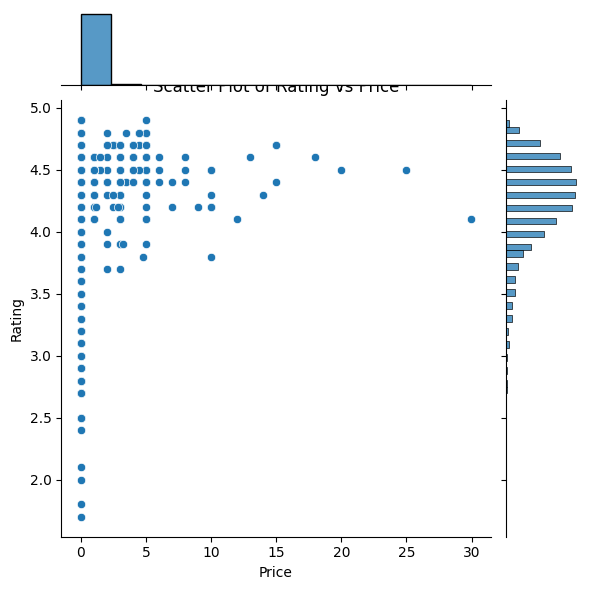

In [45]:
sns.jointplot(x = 'Price', y = 'Rating', data = df)
plt.title('Scatter Plot of Rating vs Price')
plt.xlabel('Price')
plt.ylabel('Rating')
plt.show()

A heavy concentration of points around Price = 0 indicates that most apps are free or very cheap. Free apps and paid apps can both have high or low ratings. There's no clear trend where increasing price leads to higher/lower ratings.



## Ratings vs Size


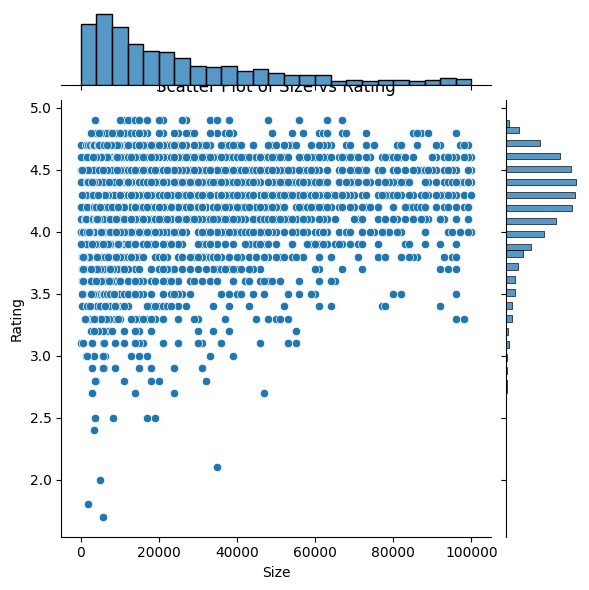

In [46]:
sns.jointplot(x = 'Size', y = 'Rating', data = df)
plt.title('Scatter Plot of Size vs Rating')
plt.xlabel('Size')
plt.ylabel('Rating')
plt.show()

The X-axis histogram shows that most apps are clustered toward the lower size range, particularly below 20,000 KB (~20 MB). The scatterplot is widely spread out with no clear upward or downward trend. This suggests that app size doesn't significantly influence user rating.



## Ratings vs Reviews

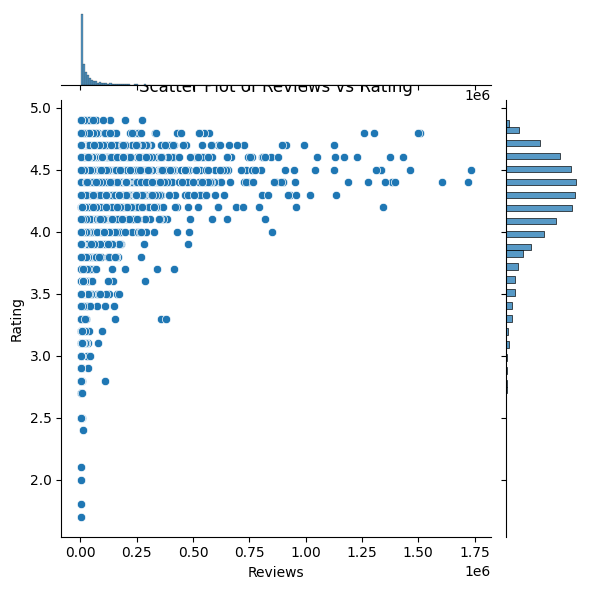

In [47]:
sns.jointplot(x = 'Reviews', y = 'Rating', data = df)
plt.title('Scatter Plot of Reviews vs Rating')
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.show()

Apps with ratings between 4.0 and 5.0 are found throughout the x-axis (number of reviews). This indicates that good ratings are not limited to high-review-count apps. Also, popular apps are generally well-rated, or that poorly rated apps don’t get many users/reviews.

##Ratings vs Content Rating


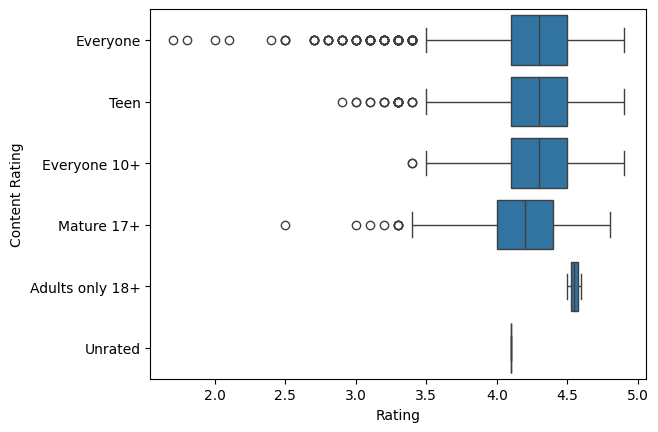

In [48]:
sns.boxplot(x = 'Rating', y = 'Content Rating', data = df)
plt.show()

* “Everyone” and “Teen” apps dominate the dataset, and while they vary more, they tend to be well-rated.

* Apps for adults (17+ and 18+) are fewer but tend to get stable and slightly higher ratings.

*  **'Content Rating'** appears to be an informative feature for predicting 'Rating'. The distinct distributions, especially for 'Adults only 18+', suggest that this categorical variable provides valuable signals.



## Rating vs Category

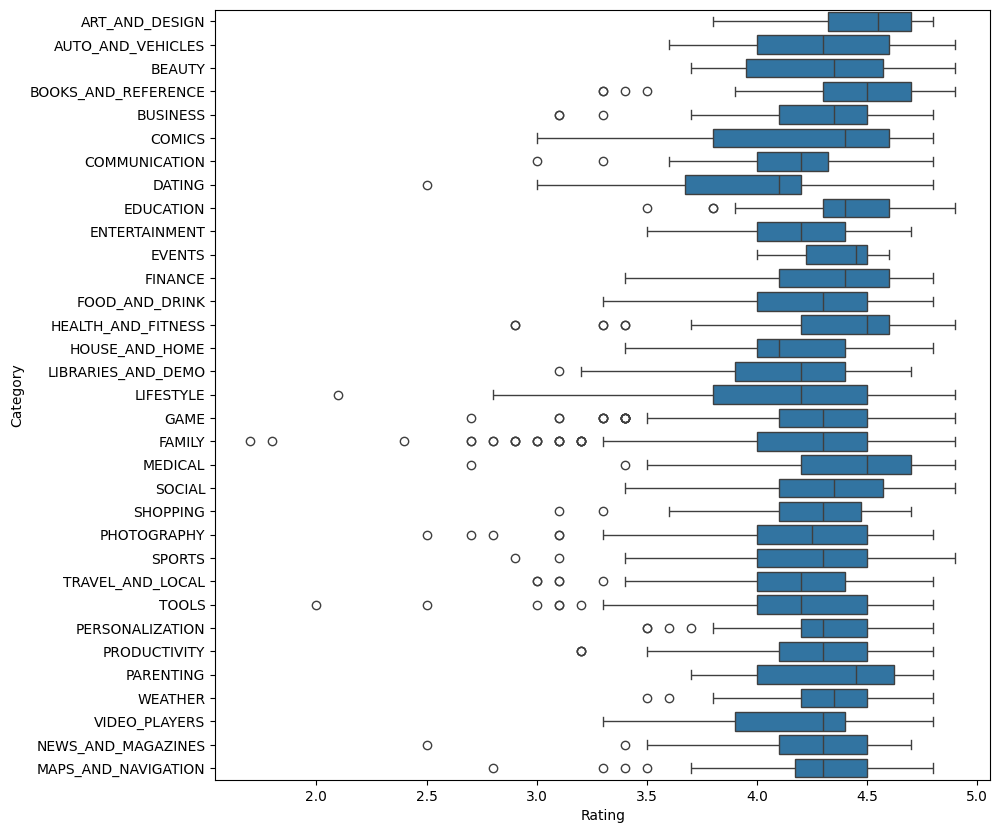

In [49]:
plt.figure(figsize = (10,10))
sns.boxplot(x = 'Rating', y = 'Category', data = df)
plt.show()

* Across almost all categories, median ratings are above 4.0, indicating that users generally rate apps highly.

* This suggests user satisfaction is relatively strong in general on the Play Store.

* Some categories consistently perform better, while others are more inconsistent.

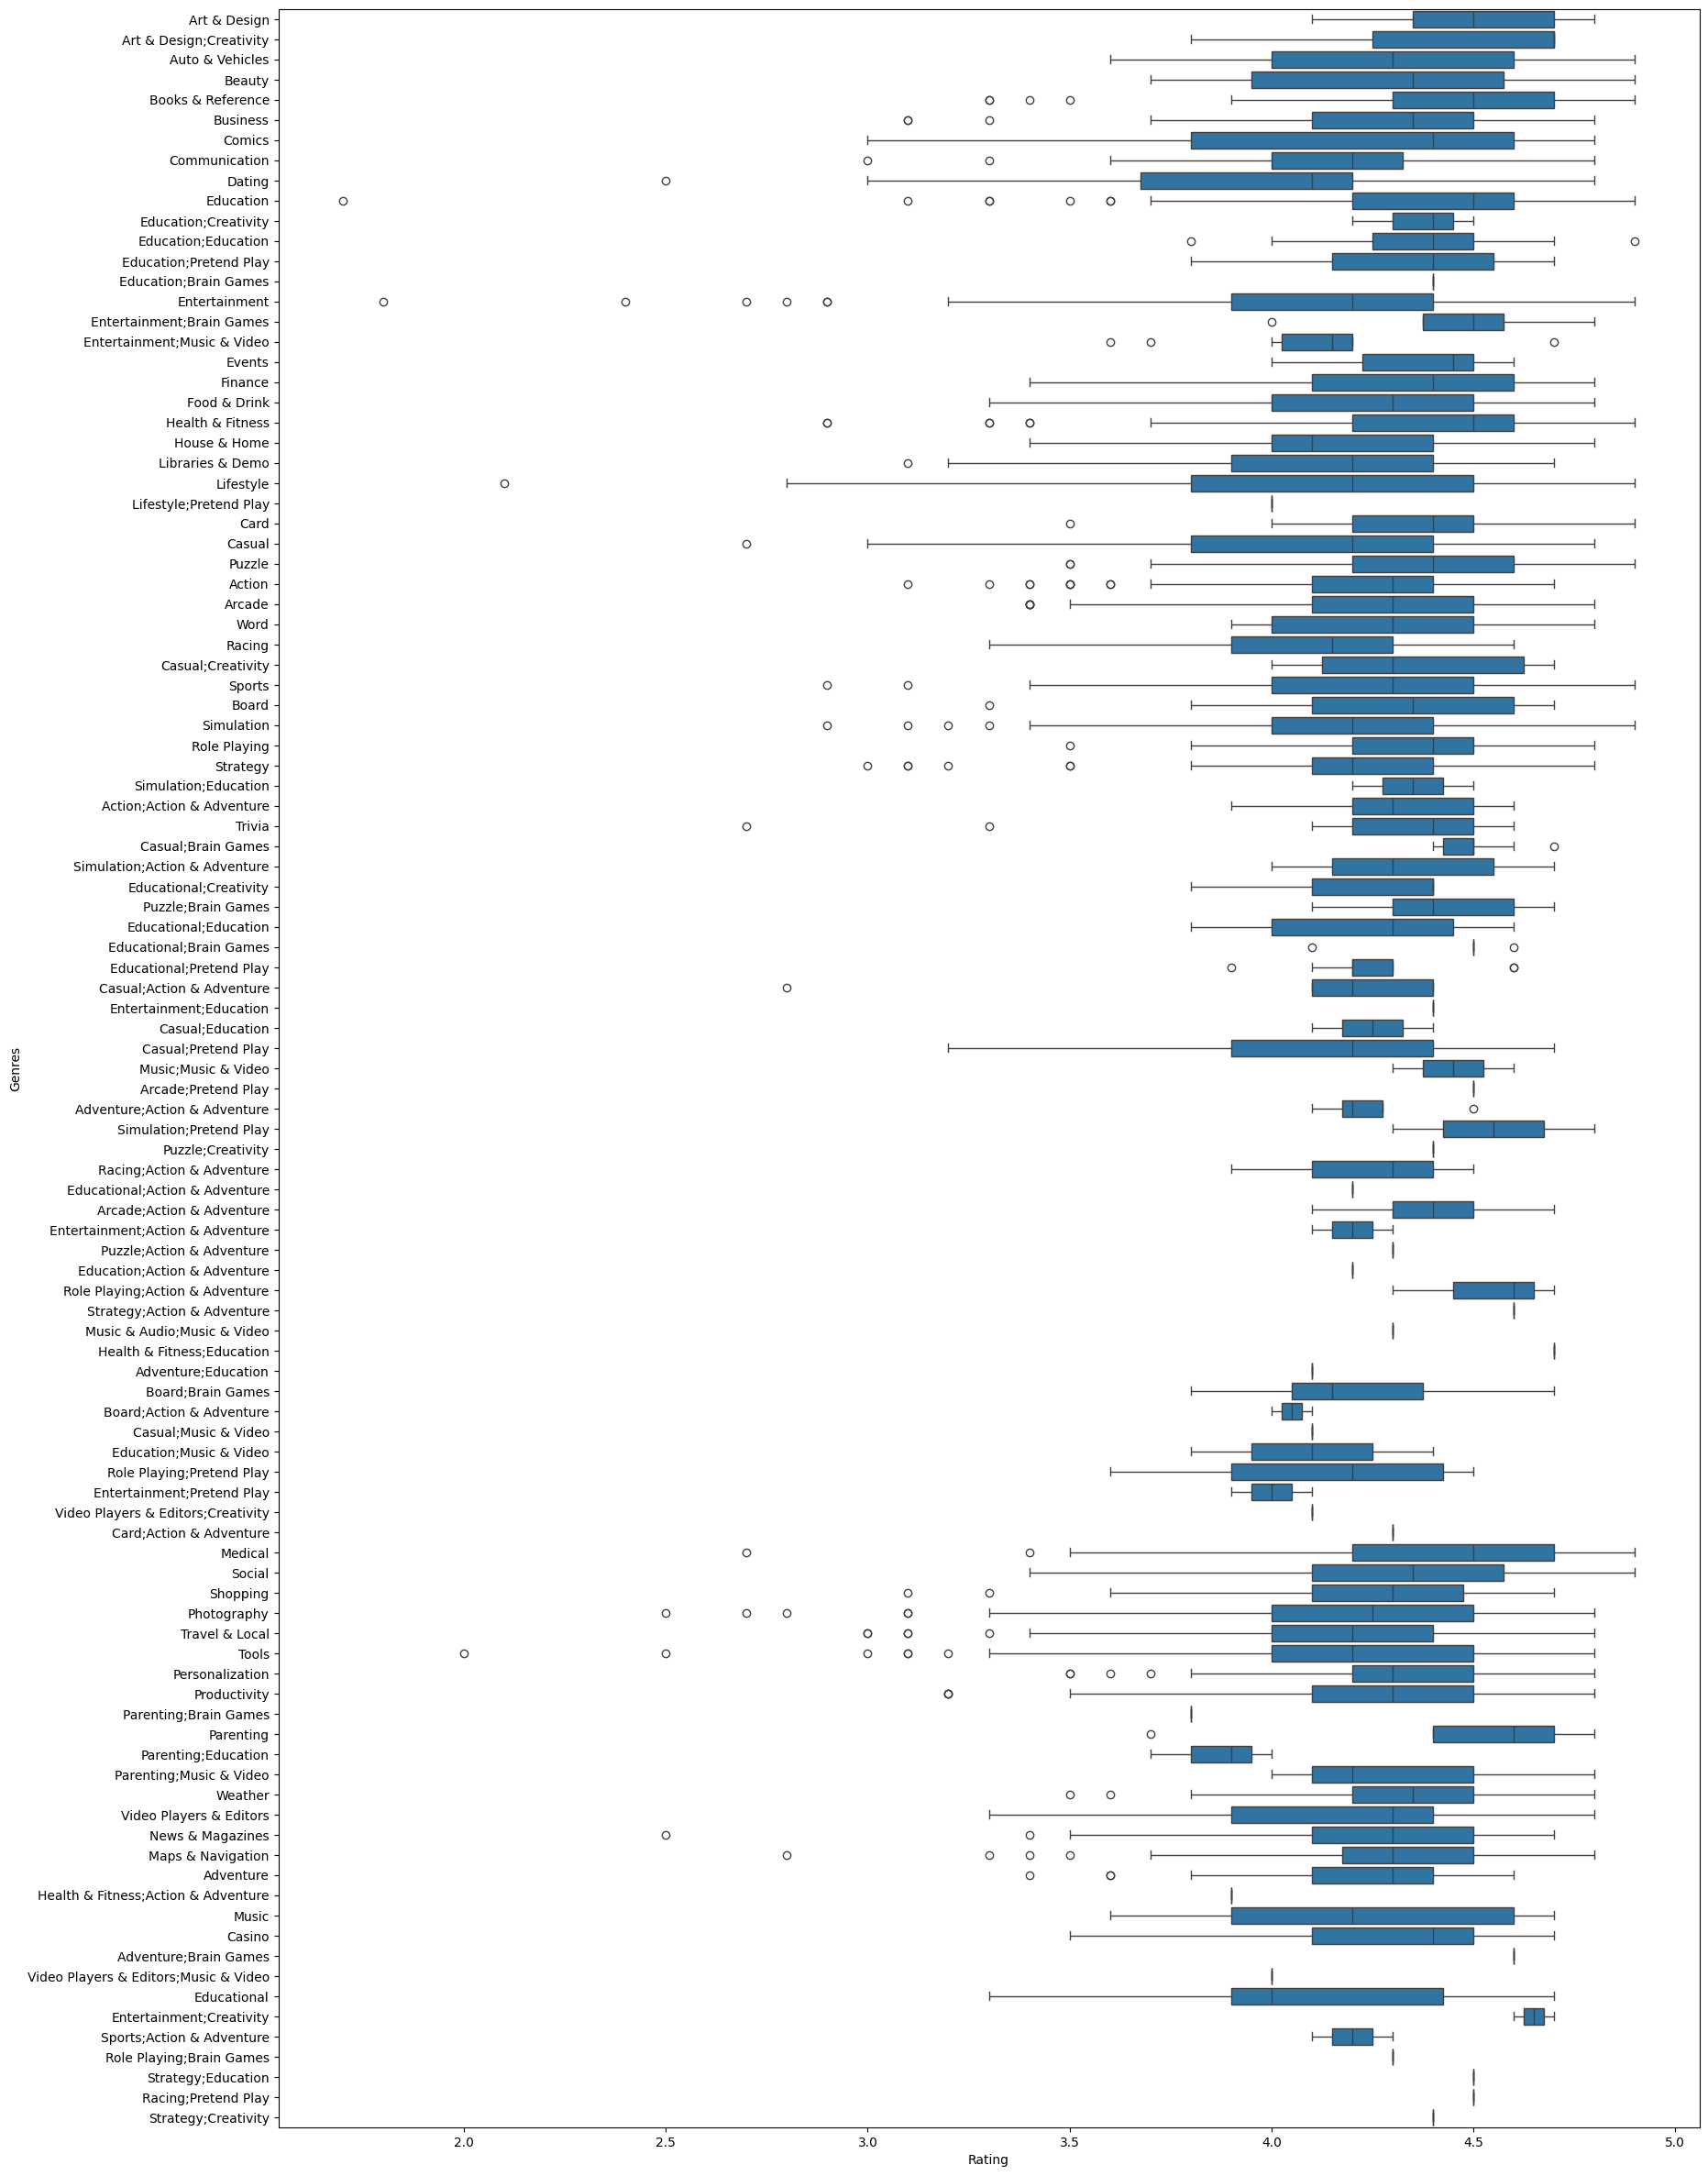

In [50]:
plt.figure(figsize = (20,30))
sns.boxplot(x = 'Rating', y = 'Genres', data = df)
plt.show()

 'Genres' are likely to be an important feature for predicting 'Rating'. The distinct rating distributions across genres suggest that knowing an app's genre provides strong clues about its typical rating.

# Machine Learning

## Data Preprocessing

In [51]:
inp1 = df.copy()

Reviews and Installs have high variance and will skew our model. Now we'll scale the 'Reviews' and 'Installs' Column using Logarthmic Transformation.


In [52]:
inp1['Reviews'] = inp1['Reviews'].apply(np.log1p)

In [53]:
inp1['Installs'] = inp1['Installs'].apply(np.log1p)

In [54]:
inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

Drop columns which are not required to create the model like App, Size, Type, Price, Last Updated, Current Ver and Android Ver. These variables are not useful for our task.

In [55]:
inp1.drop(['App', 'Size', 'Type', 'Price', 'Last Updated', 'Current Ver', 'Android Ver'], axis = 1, inplace = True)

## One-Hot Encoding



In [56]:
inp2 = pd.get_dummies(inp1, dtype = 'int')

## Train Test Split

In [57]:
x = inp2.drop(['Rating'], axis = 1)
y = inp2['Rating']

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [59]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2464, 146), (1057, 146), (2464,), (1057,))

In [60]:
lm = LinearRegression()

In [61]:
lm.fit(x_train,y_train)

LinearRegression()

In [62]:
y_hat = lm.predict(x_test)

In [63]:
print('MSE is', mean_squared_error(y_test, y_hat))

MSE is 0.12263275098673808


In [64]:
print('RSME is', np.sqrt(mean_squared_error(y_test, y_hat)))

RSME is 0.3501895929160918


In [65]:
print('R2 score is', r2_score(y_test, y_hat))

R2 score is 0.17421861673889283


## Model Persistance


In [66]:
joblib.dump(lm, 'linear_model.sav')

['linear_model.sav']

In [67]:
lin1 = joblib.load('linear_model.sav')